In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.layers import Embedding, BatchNormalization, Concatenate
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [4]:
df = pd.read_csv("train.txt",
                 delimiter=';', header=None, names=['sentence','label'])

val_df = pd.read_csv("val.txt",
                 delimiter=';', header=None, names=['sentence','label'])

ts_df = pd.read_csv("test.txt",
                 delimiter=';', header=None, names=['sentence','label'])

In [5]:
df

,sentence,label
0,Berjalan-jalan di pantai saat matahari terbena...,NaN
1,Menyaksikan pertunjukan musik favoritku membua...,NaN
2,Mendengar kabar baik dari dokter bahwa kesehat...,NaN
3,Saat melihat anjing peliharaanku melompat-lomp...,NaN
4,Memenangkan perlombaan yang aku ikuti memberi ...,NaN
5,"Ketika merasa dikhianati oleh sahabat, aku mer...",NaN
6,"Saat kita berdua, waktu berjalan lebih lambat,...",NaN
7,Kau adalah matahariku yang terang benderang di...,NaN
8,Setiap tatapanmu menusuk jiwaku dengan kehanga...,NaN
9,"Kita adalah satu, terjalin dalam cinta yang ta...",NaN


In [6]:
df['label'].unique()

array([nan])

In [20]:
df.label.value_counts()

label
 Maya, dengan pencariannya akan melodi-melodi yang menggambarkan perasaan-perasaan yang sulit diungkapkan dalam kata-kata.    1
Name: count, dtype: int64

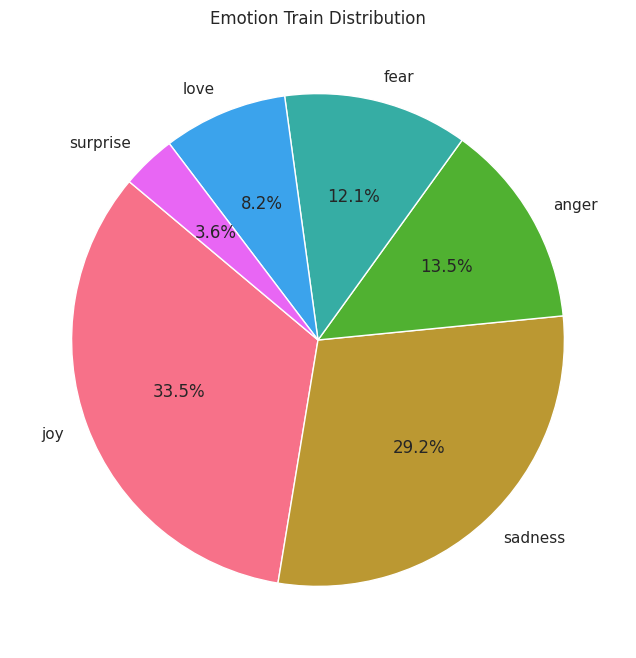

In [7]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

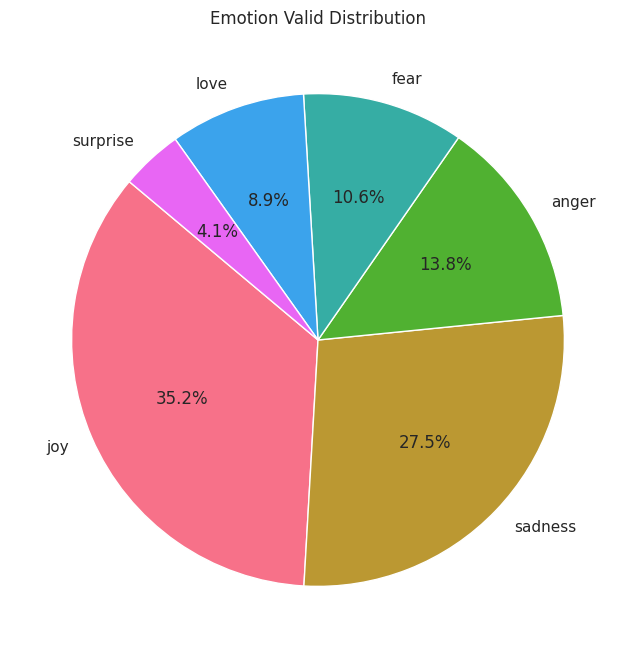

In [8]:
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Valid Distribution')
plt.show()

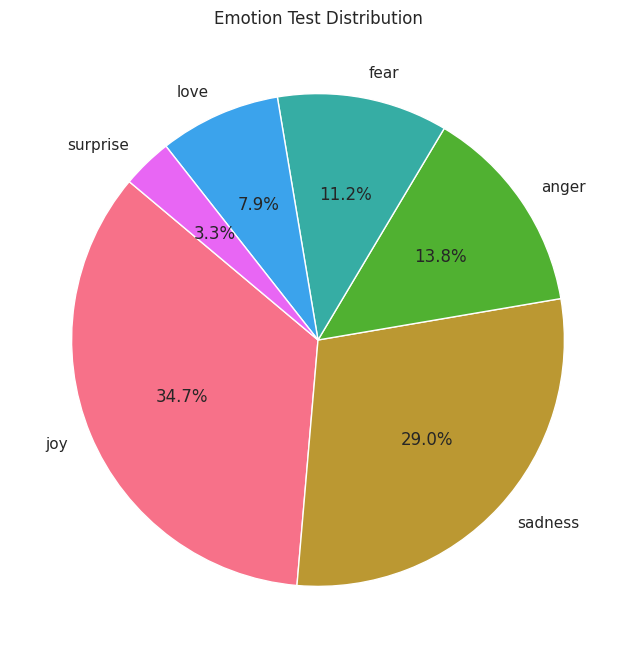

In [9]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Test Distribution')
plt.show()

In [10]:
df = df[~df['label'].str.contains('love')]
df = df[~df['label'].str.contains('surprise')]